In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from sklearn.model_selection import train_test_split
from sklearn import set_config

from sklearn.pipeline import make_pipeline 
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate, GridSearchCV

In [2]:
firm_performance = pd.read_csv('../outputs/Firm_Performance.csv')
firm_data = pd.read_csv('../inputs/Firm_data.csv')

In [3]:
BOD_df = pd.read_csv('../outputs/BOD_DF.csv')
CEO_df = pd.read_csv('../outputs/CEO_DF.csv')
BOD_df.columns = BOD_df.columns.str.lower()
CEO_df.columns = CEO_df.columns.str.lower()

In [4]:
firm_performance

,tic,fyear,roa,EBITDA_margin,NI_rev,roe,eps,chng_price,div_yield,vol,mva,tobinsQ,asset_g,revenue_g,ni_g,employee_g
0,AAL,2010,-0.018774,0.058773,-0.021245,0.119392,-1.412506,1.123689,0.000000,0.604973,6542.5755,1.260785,-0.013759,0.113119,-0.679155,-0.008238
1,AAL,2011,-0.082984,0.028932,-0.082383,0.278301,-5.902740,-0.523944,0.000000,0.642134,7228.3438,1.303101,-0.049426,0.083536,3.201699,0.023642
2,AAL,2012,-0.079796,0.057695,-0.075478,0.234882,-5.595123,1.498047,0.000000,0.572826,8253.5571,1.351066,-0.014173,0.034677,-0.052046,-0.029338
3,AAL,2013,-0.043380,0.110662,-0.068658,0.671549,-7.024963,0.772532,0.000000,0.362859,9322.9923,1.220516,0.798299,0.074713,-0.022388,0.419936
4,AAL,2014,0.065843,0.154396,0.067573,1.426027,4.132048,1.117107,0.003729,0.386805,35384.5843,1.808402,0.035314,0.596661,-2.571429,0.026268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,ALLE,2015,0.067343,0.214738,0.074416,6.011719,1.603275,0.217927,0.006068,0.203976,6302.1267,3.757680,0.133638,-0.023698,-0.121575,0.105882
4878,ALLE,2016,0.101940,0.218945,0.102368,2.022065,2.404643,-0.000967,0.007500,0.221979,5984.2360,3.662737,-0.016584,0.082153,0.488629,0.000000
4879,ALLE,2017,0.107514,0.235570,0.113487,0.680528,2.874966,0.239666,0.008044,0.173708,7161.5327,3.817283,0.131085,0.076050,0.192929,0.063830
4880,ALLE,2018,0.154758,0.226599,0.159205,0.668049,4.595454,-0.007339,0.010538,0.227619,6892.5153,3.452678,0.105507,0.134333,0.591292,0.100000


In [5]:
set_config(display="diagram")

performance_score = firm_performance
firm_performance = firm_performance.dropna(subset=['tobinsQ'])
# load data and split off X and y
y = firm_performance.tobinsQ
firm_performance = firm_performance.drop('tobinsQ',axis=1)

scores_df = firm_performance[['tic', 'fyear']].copy()

firm_performance = firm_performance.drop('fyear',axis=1)

In [6]:
# create test set for use later
rng = np.random.RandomState(0)
X_train, X_test, y_train, y_test = train_test_split(firm_performance, y, random_state=rng)

In [7]:
numer_pipe = make_pipeline(SimpleImputer(), 
                           StandardScaler())

preproc_pipe = ColumnTransformer(
    [ 
    # numerical vars
    ("num_impute", numer_pipe, make_column_selector(dtype_include=np.number)),
    ]
    , remainder = 'drop'
)

In [8]:
preproc_pipe

ColumnTransformer(transformers=[('num_impute',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f83d55c4250>)])

In [9]:
linear_pipe = make_pipeline(preproc_pipe,
                           LinearRegression())

results = linear_pipe.fit(X_train, y_train)

In [10]:
y_test_predict = linear_pipe.predict(X_test)
test_score = r2_score(y_test,y_test_predict)
test_score

0.34914477601467586

In [11]:
coefficients = linear_pipe.named_steps['linearregression'].coef_
coefficients

array([ 0.879905  ,  0.01125229, -0.41073413, -0.06904754, -0.13405432,
        0.30859718, -0.20968415,  0.20016348,  0.1831434 , -0.04501542,
        0.11891214,  0.01627358,  0.17553319])

In [12]:
coef_df = pd.DataFrame({'metric':X_train.columns[1:],
                        'weight':coefficients})
coef_df

,metric,weight
0,roa,0.879905
1,EBITDA_margin,0.011252
2,NI_rev,-0.410734
3,roe,-0.069048
4,eps,-0.134054
5,chng_price,0.308597
6,div_yield,-0.209684
7,vol,0.200163
8,mva,0.183143
9,asset_g,-0.045015


In [13]:
weights = np.abs(coefficients) / np.sum(np.abs(coefficients))

In [14]:
weight_df = pd.DataFrame({'metric':X_train.columns[1:],
                        'weight':weights})
weight_df

,metric,weight
0,roa,0.318539
1,EBITDA_margin,0.004073
2,NI_rev,0.148692
3,roe,0.024996
4,eps,0.048530
5,chng_price,0.111717
6,div_yield,0.075909
7,vol,0.072462
8,mva,0.066301
9,asset_g,0.016296


[Text(0, 0, 'Return on Assets'),
 Text(1, 0, 'Net Income / Revenue'),
 Text(2, 0, 'Change in Stock Price'),
 Text(3, 0, 'Dividend Yield'),
 Text(4, 0, 'Stock Price Volatility'),
 Text(5, 0, 'Market Value Added'),
 Text(6, 0, 'Number of Employees Growth'),
 Text(7, 0, 'Earnings per Share'),
 Text(8, 0, 'Net Revenue Growth'),
 Text(9, 0, 'Return on Equity'),
 Text(10, 0, 'Asset Growth'),
 Text(11, 0, 'Net Income Growth'),
 Text(12, 0, 'EBITDA Margin')]

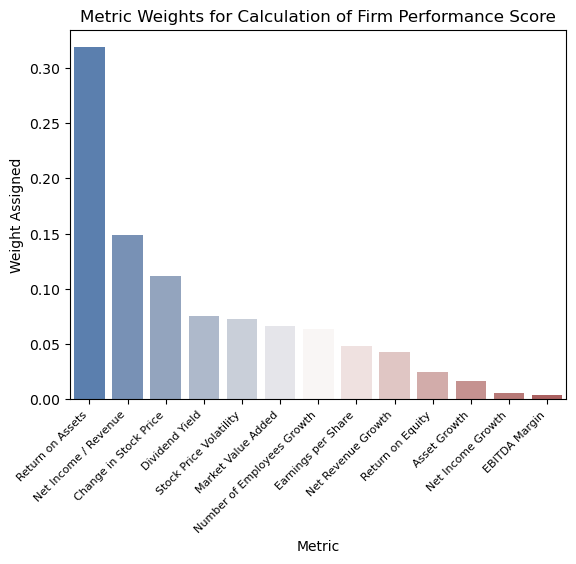

In [61]:
weight_named = weight_df
weight_named['metric'] = ['Return on Assets', 'EBITDA Margin', 'Net Income / Revenue', 'Return on Equity', 'Earnings per Share', 'Change in Stock Price',
                          'Dividend Yield', 'Stock Price Volatility', 'Market Value Added', 'Asset Growth', 'Net Revenue Growth', 'Net Income Growth',
                          'Number of Employees Growth']

weight_sorted = weight_named.sort_values(by='weight')[::-1]

fig, ax = plt.subplots()
sns.barplot(data = weight_sorted, x='metric', y='weight', palette="vlag")
ax.set(title='Metric Weights for Calculation of Firm Performance Score',
        xlabel = 'Metric',
        ylabel = 'Weight Assigned')
ax.tick_params(axis='x', rotation=45, labelsize=8)
ax.set_xticklabels(ax.get_xticklabels(), ha='right')

In [15]:
weight_dict = weight_df.set_index('metric').T.to_dict('list')

In [16]:
scaler = StandardScaler()
performance_score = pd.DataFrame(scaler.fit_transform(performance_score.iloc[:, 2:]), columns=performance_score.iloc[:, 2:].columns)

In [17]:
performance_score

,roa,EBITDA_margin,NI_rev,roe,eps,chng_price,div_yield,vol,mva,tobinsQ,asset_g,revenue_g,ni_g,employee_g
0,-1.064598,-0.779009,-0.588044,0.002450,-0.003444,3.041197,-0.655657,3.416618,-0.319913,-0.606562,-0.372228,0.054612,-0.069031,-0.369472
1,-1.900607,-0.909013,-0.870503,0.058396,-0.003869,-2.306063,-0.655657,3.784034,-0.307645,-0.582438,-0.472503,-0.032340,0.318936,-0.195798
2,-1.859098,-0.783708,-0.838602,0.043110,-0.003840,4.256146,-0.655657,3.098780,-0.289305,-0.555093,-0.373393,-0.175950,-0.006339,-0.484418
3,-1.384961,-0.552956,-0.807096,0.196843,-0.003976,1.901545,-0.655657,1.022835,-0.270173,-0.629519,1.910785,-0.058273,-0.003374,1.963075
4,0.037104,-0.362427,-0.177700,0.462465,-0.002919,3.019835,-0.523556,1.259588,0.196055,-0.294367,-0.234265,1.475852,-0.258201,-0.181493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,0.056644,-0.099547,-0.146086,2.076907,-0.003158,0.101620,-0.440713,-0.548050,-0.324215,0.816907,0.042161,-0.347527,-0.013290,0.252218
4878,0.507089,-0.081218,-0.016946,0.672307,-0.003082,-0.608784,-0.389986,-0.370056,-0.329902,0.762780,-0.380172,-0.036407,0.047712,-0.324593
4879,0.579659,-0.008793,0.034424,0.200004,-0.003038,0.172169,-0.370708,-0.847312,-0.308841,0.850886,0.034984,-0.054344,0.018151,0.023130
4880,1.194771,-0.047876,0.245642,0.195611,-0.002875,-0.629465,-0.282365,-0.314295,-0.313653,0.643026,-0.036924,0.116962,0.057975,0.220173


In [18]:
for metric in weight_dict:
    performance_score[metric] = performance_score[metric] * weight_dict[metric]

In [19]:
performance_score['Performance Score'] = performance_score.sum(axis=1)

In [20]:
performance_score

,roa,EBITDA_margin,NI_rev,roe,eps,chng_price,div_yield,vol,mva,tobinsQ,asset_g,revenue_g,ni_g,employee_g,Performance Score
0,-0.339116,-0.003173,-0.087437,0.000061,-0.000167,0.339753,-0.049770,0.247576,-0.021210,-0.606562,-0.006066,0.002351,-0.000407,-0.023478,-0.547646
1,-0.605417,-0.003703,-0.129437,0.001460,-0.000188,-0.257626,-0.049770,0.274199,-0.020397,-0.582438,-0.007700,-0.001392,0.001879,-0.012442,-1.392972
2,-0.592195,-0.003192,-0.124693,0.001078,-0.000186,0.475483,-0.049770,0.224544,-0.019181,-0.555093,-0.006085,-0.007574,-0.000037,-0.030783,-0.687686
3,-0.441164,-0.002252,-0.120009,0.004920,-0.000193,0.212435,-0.049770,0.074117,-0.017913,-0.629519,0.031139,-0.002509,-0.000020,0.124745,-0.815992
4,0.011819,-0.001476,-0.026423,0.011560,-0.000142,0.337366,-0.039743,0.091273,0.012999,-0.294367,-0.003818,0.063532,-0.001521,-0.011533,0.149527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4877,0.018043,-0.000406,-0.021722,0.051915,-0.000153,0.011353,-0.033454,-0.039713,-0.021496,0.816907,0.000687,-0.014960,-0.000078,0.016027,0.782951
4878,0.161528,-0.000331,-0.002520,0.016805,-0.000150,-0.068011,-0.029603,-0.026815,-0.021873,0.762780,-0.006195,-0.001567,0.000281,-0.020626,0.763702
4879,0.184644,-0.000036,0.005119,0.004999,-0.000147,0.019234,-0.028140,-0.061398,-0.020476,0.850886,0.000570,-0.002339,0.000107,0.001470,0.954492
4880,0.380581,-0.000195,0.036525,0.004890,-0.000140,-0.070322,-0.021434,-0.022774,-0.020795,0.643026,-0.000602,0.005035,0.000342,0.013991,0.948128


In [21]:
scores_df['Performance_Score'] = performance_score['Performance Score']

In [22]:
scores_df.drop_duplicates()
scores_df.describe()

,fyear,Performance_Score
count,4772.000000,4772.000000
mean,2014.512364,0.003891
std,2.888781,1.249095
min,2009.000000,-8.647303
25%,2012.000000,-0.762996
50%,2015.000000,-0.336162
75%,2017.000000,0.371772
max,2019.000000,11.409034


In [23]:
scores_df.query('Performance_Score >= 11')

,tic,fyear,Performance_Score
4485,DXCM,2014,11.409034


In [24]:
small_bod_df = pd.read_csv('../Saved/small_bod_df.csv')
small_ceo_df = pd.read_csv('../Saved/small_ceo_df.csv')
med_bod_df = pd.read_csv('../Saved/medium_bod_df.csv')
med_ceo_df = pd.read_csv('../Saved/medium_ceo_df.csv')
large_bod_df = pd.read_csv('../Saved/large_bod_df.csv')
large_ceo_df = pd.read_csv('../Saved/large_ceo_df.csv')

pred_small_bod_df = pd.read_csv('../Saved/pred_small_bod_df.csv')
pred_small_ceo_df = pd.read_csv('../Saved/pred_small_ceo_df.csv')
pred_med_bod_df = pd.read_csv('../Saved/pred_med_bod_df.csv')
pred_med_ceo_df = pd.read_csv('../Saved/pred_med_ceo_df.csv')
pred_large_bod_df = pd.read_csv('../Saved/pred_large_bod_df.csv')
pred_large_ceo_df = pd.read_csv('../Saved/pred_large_ceo_df.csv')

In [25]:
small_bod_df

,signature_index,total_director_comp
0,847603370a479bc2ed0bb3a74b270aae,2004.756
1,55321521b6e50b4bccfe97ebffed402d,2004.756
2,6602b77c9233d608bee1e0ef777ceabe,2844.516
3,a4a364c43e04b6e306a019531f0c989c,916.408
4,72c81d3d7e18ddc6f0d59d44f315d924,916.408
...,...,...
350,4ba265aceebf418304d95acc6bf7ee46,370.362
351,34f17cbdc11567bffaaba85e4aa30d7a,0.000
352,58005ef83812589ce047027b2a097766,0.000
353,b33c9610b47875a2cebb9d47b97dd758,200.136


In [26]:
small_bod_df['prediction'] = pred_small_bod_df['prediction']
med_bod_df['prediction'] = pred_med_bod_df['prediction']
large_bod_df['prediction'] = pred_large_bod_df['prediction']

small_ceo_df['prediction'] = pred_small_ceo_df['prediction']
med_ceo_df['prediction'] = pred_med_ceo_df['prediction']
large_ceo_df['prediction'] = pred_large_ceo_df['prediction']

In [28]:
small_bod_df['over_under_comp'] = small_bod_df['total_director_comp']/pred_small_bod_df['prediction']
med_bod_df['over_under_comp'] = med_bod_df['total_director_comp']/pred_med_bod_df['prediction']
large_bod_df['over_under_comp'] = large_bod_df['total_director_comp']/pred_large_bod_df['prediction']

small_bod_df = small_bod_df.drop_duplicates()
med_bod_df = med_bod_df.drop_duplicates()
large_bod_df = large_bod_df.drop_duplicates()

small_ceo_df['over_under_comp'] = small_ceo_df['tdc1']/pred_small_ceo_df['prediction']
med_ceo_df['over_under_comp'] = med_ceo_df['tdc1']/pred_med_ceo_df['prediction']
large_ceo_df['over_under_comp'] = large_ceo_df['tdc1']/pred_large_ceo_df['prediction']

small_ceo_df = small_ceo_df.drop_duplicates()
med_ceo_df = med_ceo_df.drop_duplicates()
large_ceo_df = large_ceo_df.drop_duplicates()

In [29]:
BOD_key = BOD_df[['ticker','year','signature_index']]
CEO_key = CEO_df[['ticker','year','signature_index']]

BOD_key = BOD_key.drop_duplicates()
CEO_key = CEO_key.drop_duplicates()

In [45]:
CEO_key

,ticker,year,signature_index
0,AAL,2010,645bcd0e850075f48a7ba136945a6a08
1,AAL,2011,bb795ace47922d5a7519d44ca3dbcc86
2,AAL,2012,43531710f52c752cbeea9ef747e908ac
3,AAL,2013,64855fa7246f66fbe28bfacacd9dbde4
4,AAL,2014,71f0bef52756d54e79174a8d3b1732d0
...,...,...,...
4766,ALLE,2015,28e2628ba30c4b4115a88120bda402ac
4767,ALLE,2016,ad6ec483676e48ce07308a2c8c72c324
4768,ALLE,2017,bc8c901364dc79655484aa88cf48f827
4769,ALLE,2018,8e949a383f8af7f447ed2c5c494a7439


In [34]:
BOD_small_merged = small_bod_df.merge(BOD_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='1:1')
BOD_med_merged = med_bod_df.merge(BOD_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='1:1')
BOD_large_merged = large_bod_df.merge(BOD_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='1:1')

CEO_small_merged = small_ceo_df.merge(CEO_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='m:1')
CEO_med_merged = med_ceo_df.merge(CEO_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='m:1')
CEO_large_merged = large_ceo_df.merge(CEO_key, 
                how='left',
                on='signature_index',
                indicator=False,
                validate='m:1')

In [48]:
CEO_med_merged

,signature_index,tdc1,prediction,over_under_comp,ticker,year
0,3402205a7e4889f1b8ca6029b54e67da,12175.486,11865.248951,1.026147,NaN,NaN
1,920e7e3eb8fc1c68b8be8bfec0de12c5,11999.517,11756.623766,1.020660,NaN,NaN
2,1fa1919a294f5dd7bcc4d6d00553494c,11571.714,13639.189496,0.848417,NaN,NaN
3,9cd12e1744a5f4ce15c9058638aa7332,9560.511,8623.711726,1.108631,NaN,NaN
4,87a754d2ebde4eff20aa619680fbd975,15620.117,13950.266971,1.119700,NaN,NaN
...,...,...,...,...,...,...
1240,7f9aa4ff6034fb8bc5852811feac4e4e,13419.419,9525.709500,1.408758,NaN,NaN
1241,be77cb95aab45e8f0bdcfabecd610a94,17568.641,24326.023943,0.722216,NaN,NaN
1242,b38d6faebd36b2dc1e4853dd8fae52ad,18193.585,25765.445268,0.706123,NaN,NaN
1243,b5d934583b50c84da02f0e6e4897af36,15922.981,26986.002960,0.590046,NaN,NaN


In [35]:
BOD_small = BOD_small_merged[['ticker', 'year', 'over_under_comp']]
BOD_small = BOD_small.rename(columns={'ticker':'tic','year':'fyear'})
BOD_small = BOD_small.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

BOD_med = BOD_med_merged[['ticker', 'year', 'over_under_comp']]
BOD_med = BOD_med.rename(columns={'ticker':'tic','year':'fyear'})
BOD_med = BOD_med.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

BOD_large = BOD_large_merged[['ticker', 'year', 'over_under_comp']]
BOD_large = BOD_large.rename(columns={'ticker':'tic','year':'fyear'})
BOD_large = BOD_large.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

BOD_small = BOD_small.drop_duplicates()
BOD_med = BOD_med.drop_duplicates()
BOD_large = BOD_large.drop_duplicates()

In [36]:
CEO_small = CEO_small_merged[['ticker', 'year', 'over_under_comp']]
CEO_small = CEO_small.rename(columns={'ticker':'tic','year':'fyear'})
CEO_small = CEO_small.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

CEO_med = CEO_med_merged[['ticker', 'year', 'over_under_comp']]
CEO_med = CEO_med.rename(columns={'ticker':'tic','year':'fyear'})
CEO_med = CEO_med.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

CEO_large = CEO_large_merged[['ticker', 'year', 'over_under_comp']]
CEO_large = CEO_large.rename(columns={'ticker':'tic','year':'fyear'})
CEO_large = CEO_large.merge(scores_df,
                how='left',
                on=['tic','fyear'],
                indicator=False,
                validate='m:1')

CEO_small = CEO_small.drop_duplicates()
CEO_med = CEO_med.drop_duplicates()
CEO_large = CEO_large.drop_duplicates()

In [37]:
BOD_small_corr = BOD_small['over_under_comp'].corr(BOD_small['Performance_Score'])
BOD_med_corr = BOD_med['over_under_comp'].corr(BOD_med['Performance_Score'])
BOD_large_corr = BOD_large['over_under_comp'].corr(BOD_large['Performance_Score'])

BOD_correlations = pd.DataFrame({'Firm Size':['Small', 'Medium', 'Large'],
                        'Correlation':[BOD_small_corr, BOD_med_corr, BOD_large_corr]})

print('Correlation between BOD payment and firm performance:\n')
print(BOD_correlations)

Correlation between BOD payment and firm performance:

  Firm Size  Correlation
0     Small          NaN
1    Medium          NaN
2     Large          NaN


In [38]:
CEO_small_corr = CEO_small['over_under_comp'].corr(CEO_small['Performance_Score'])
CEO_med_corr = CEO_med['over_under_comp'].corr(CEO_med['Performance_Score'])
CEO_large_corr = CEO_large['over_under_comp'].corr(CEO_large['Performance_Score'])

CEO_correlations = pd.DataFrame({'Firm Size':['Small', 'Medium', 'Large'],
                        'Correlation':[CEO_small_corr, CEO_med_corr, CEO_large_corr]})

print('Correlation between CEO payment and firm performance:\n')
print(CEO_correlations)

Correlation between CEO payment and firm performance:

  Firm Size  Correlation
0     Small     0.241026
1    Medium          NaN
2     Large          NaN


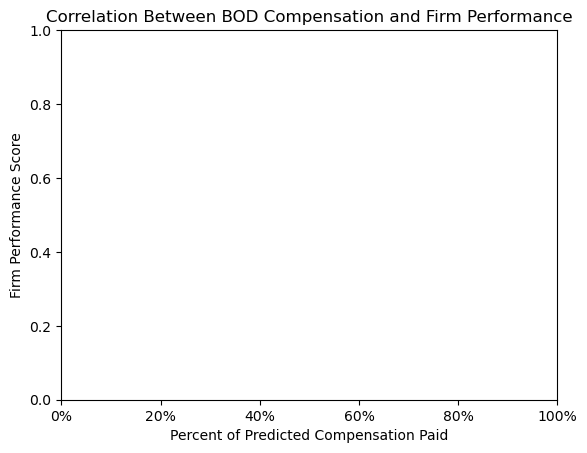

In [39]:
BOD_small['Firm Size'] = 'Small'
BOD_med['Firm Size'] = 'Medium'
BOD_large['Firm Size'] = 'Large'
BOD_combined = pd.concat([BOD_small, BOD_med, BOD_large], axis=0)

fig, ax = plt.subplots()
sns.scatterplot(data=BOD_combined,
                x='over_under_comp',
                y='Performance_Score',
                hue='Firm Size',
                ax=ax)
ax.set(title='Correlation Between BOD Compensation and Firm Performance',
    xlabel='Percent of Predicted Compensation Paid',
    ylabel='Firm Performance Score'
)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.savefig('images/BOD_corr.png')

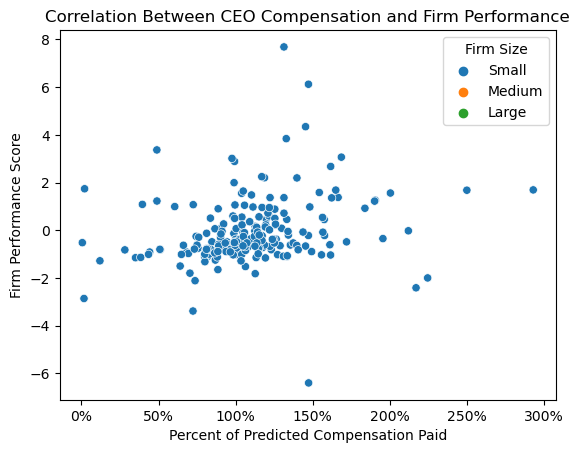

In [40]:
CEO_small['Firm Size'] = 'Small'
CEO_med['Firm Size'] = 'Medium'
CEO_large['Firm Size'] = 'Large'
CEO_combined = pd.concat([CEO_small, CEO_med, CEO_large], axis=0)

fig, ax = plt.subplots()
sns.scatterplot(data = CEO_combined,
            x='over_under_comp',
            y='Performance_Score',
            hue='Firm Size',
            ax=ax)

ax.set(title='Correlation Between CEO Compensation and Firm Performance',
        xlabel = 'Percent of Predicted Compensation Paid',
        ylabel = 'Firm Performance Score')

ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.savefig('images/CEO_corr.png')

In [41]:
BOD_small.drop_duplicates()

,tic,fyear,over_under_comp,Performance_Score,Firm Size
0,NaN,NaN,1.102454,NaN,Small
1,NaN,NaN,1.161884,NaN,Small
2,NaN,NaN,2.206668,NaN,Small
3,NaN,NaN,0.844471,NaN,Small
4,NaN,NaN,1.018110,NaN,Small
...,...,...,...,...,...
222,NaN,NaN,1.250077,NaN,Small
223,NaN,NaN,0.859340,NaN,Small
224,NaN,NaN,1.534828,NaN,Small
227,NaN,NaN,0.300229,NaN,Small


In [42]:
CEO_small.drop_duplicates()

,tic,fyear,over_under_comp,Performance_Score,Firm Size
0,PNW,2017,0.846485,-0.868226,Small
1,PNW,2018,1.003420,-0.854656,Small
2,AMD,2017,1.040441,0.550534,Small
3,ALK,2017,1.262789,-0.373993,Small
4,ALK,2018,1.231012,-0.817300,Small
...,...,...,...,...,...
205,ENPH,2019,1.453327,4.340449,Small
206,EPAM,2017,1.102740,1.478471,Small
207,EPAM,2018,1.223082,1.367652,Small
208,ALLE,2017,1.171244,0.954492,Small


In [43]:
BOD_small = BOD_small.rename(columns={'over_under_comp':'over_under_bod'})
CEO_small = CEO_small.rename(columns={'over_under_comp':'over_under_ceo'})

small_bod_ceo = pd.merge(BOD_small, CEO_small, 
                         on=['tic','fyear'],
                         how='left',
                         validate='1:m')
small_bod_ceo = small_bod_ceo[['tic','fyear','over_under_ceo','over_under_bod','Performance_Score_x','Firm Size_x']].rename(columns={'Performance_Score_x':'Performance_Score',
                                                                                                                                    'Firm Size_x':'Firm Size'})

BOD_med = BOD_med.rename(columns={'over_under_comp':'over_under_bod'})
CEO_med = CEO_med.rename(columns={'over_under_comp':'over_under_ceo'})

med_bod_ceo = pd.merge(BOD_med, CEO_med, 
                         on=['tic','fyear'],
                         how='left',
                         validate='1:m')
med_bod_ceo = med_bod_ceo[['tic','fyear','over_under_ceo','over_under_bod','Performance_Score_x','Firm Size_x']].rename(columns={'Performance_Score_x':'Performance_Score',
                                                                                                                                'Firm Size_x':'Firm Size'})

BOD_large = BOD_large.rename(columns={'over_under_comp':'over_under_bod'})
CEO_large = CEO_large.rename(columns={'over_under_comp':'over_under_ceo'})

large_bod_ceo = pd.merge(BOD_large, CEO_large, 
                         on=['tic','fyear'],
                         how='left',
                         validate='1:m')
large_bod_ceo = large_bod_ceo[['tic','fyear','over_under_ceo','over_under_bod','Performance_Score_x','Firm Size_x']].rename(columns={'Performance_Score_x':'Performance_Score',
                                                                                                                                    'Firm Size_x':'Firm Size'})

MergeError: Merge keys are not unique in left dataset; not a one-to-many merge

In [ ]:
def assignCase(df):
    df = df.dropna()
    cases = [
        (df['over_under_ceo'] >= 1) & (df['over_under_bod'] >= 1), # Case 1
        (df['over_under_ceo'] >= 1) & (df['over_under_bod'] <= 1), # Case 2
        (df['over_under_ceo'] <= 1) & (df['over_under_bod'] >= 1), # Case 3
        (df['over_under_ceo'] <= 1) & (df['over_under_bod'] <= 1) # Case 4
    ]
    names = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
    df['Case'] = np.select(cases, names, default = np.nan)
    return df

In [ ]:
combined_bod_ceo = pd.concat([small_bod_ceo, med_bod_ceo, large_bod_ceo], axis=0)
combined_bod_ceo = assignCase(combined_bod_ceo)
combined_bod_ceo

In [ ]:
case_desc = pd.DataFrame({'Case':['Case 1','Case 2','Case 3', 'Case 4'],
                        'Description':['CEO and BOD both overpaid',
                                       'CEO overpaid and BOD underpaid',
                                       'CEO underpaid and BOD overpaid',
                                       'CEO and BOD both underpaid']})
case_desc

In [ ]:
combined_avg_perf = combined_bod_ceo.groupby(['Firm Size', 'Case']).agg({'Performance_Score': 'mean', 'Case': 'size'})
combined_avg_perf = combined_avg_perf.rename(columns={'Performance_Score':'avg_perf_score','Case':'count'})
combined_avg_perf